<a href="https://colab.research.google.com/github/mokoko95/weatherAUS/blob/main/WeatherAUS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clima de Australia
En este proyecto se llevará a cabo un análisis de datos a través de técnicas de minería utilizando la metodología de CRISP-DM, en los cuales el objetivo es establecer una relación en el cual exista un patrón proporcional de acuerdo a los datos para poder predecir el clima de Australia, ya que este país particularme tiene una asimetría bastante importante en lo que respecta el clima.
Entonces la idea es obtener un algoritmo de predicción de temperatura y su evolución del día de acuerdo a una zona N.

# 1.1 Entendimiento del negocio
La función principal de este trabajo es tener una percepción y buscar patrones dentro del DataSet para predecir las condiciones climáticas de Australia, para esto utilizaremos diversos algoritmos que nos ayudarán a clasificar el dataset.
El objetivo final de llevar a cabo este proyecto será encontrar el mejor modelo para predecir la temperatura mínima y máxima en Albury.
Estos datos temperamental a nivel lógico están representados como una variable de tipo cuantitativa continua, por ende lo acotado sería establecer modelos de entrenamiento de regresión.

# 2.1 Análisis exploratorio
En esta etapa de la metodología de CRISP-DM nos enfocaremos principalmente en analizar el dataset, para lo cual subdividiremos la fase de análisis exploratorio en: 
* Visualización 
* Analizar los tipos de datos primitivos que nos provee la data
* Descripción estadística

## 2.1.1 Visualización de la data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Mineria de datos/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [ ]:
columnas = df.shape[1]
filas = df.shape[0]
totalDatos = columnas * filas
print(f'el total de columnas de la data es de {columnas}, mientras que la cantidad de filas corresponde a {filas}')
print(f'lo que corresponde un total de {totalDatos} datos a analizar')

El total de columnas de la data es de 24, mientras que la cantidad de filas corresponde a 142.193,
dando un total de 3.412.632 datos a analizar.

## 2.1.2 Tipos de datos que encontramos en el DataSet
El siguiente paso es explorar los tipos de datos que podemos encontrar en la data. Esto será muy importante en la etapa de análisis ya que a través de esta observación podemos tener una visión general de lo que se viene en el preprocesamiento de datos, y esto es debido a que los algoritmos en los que se someterán los datos necesitan variables numéricas, que en este caso estarían representados por un Float o un Int. En caso de que existan variables de otra índole como un Objeto, ha de ser investigado con posterioridad.

In [ ]:
tipos = df.dtypes
nombreCol = df.columns
for i,j in zip(tipos , nombreCol):
    print(f'El tipo de variable de la columna {j} es {i}')

* El tipo de variable de la columna Date es object
* El tipo de variable de la columna Location es object
* El tipo de variable de la columna MinTemp es float64
* El tipo de variable de la columna MaxTemp es float64
* El tipo de variable de la columna Rainfall es float64
* El tipo de variable de la columna Evaporation es float64
* El tipo de variable de la columna Sunshine es float64
* El tipo de variable de la columna WindGustDir es object
* El tipo de variable de la columna WindGustSpeed es float64
* El tipo de variable de la columna WindDir9am es object
* El tipo de variable de la columna WindDir3pm es object
* El tipo de variable de la columna WindSpeed9am es float64
* El tipo de variable de la columna WindSpeed3pm es float64
* El tipo de variable de la columna Humidity9am es float64
* El tipo de variable de la columna Humidity3pm es float64
* El tipo de variable de la columna Pressure9am es float64
* El tipo de variable de la columna Pressure3pm es float64
* El tipo de variable de la columna Cloud9am es float64
* El tipo de variable de la columna Cloud3pm es float64
* El tipo de variable de la columna Temp9am es float64
* El tipo de variable de la columna Temp3pm es float64
* El tipo de variable de la columna RainToday es object
* El tipo de variable de la columna RISK_MM es float64
* El tipo de variable de la columna RainTomorrow es object





In [ ]:
nulos = df.isnull().sum()
totalNulos = df.isnull().sum().sum()
for i,j in zip(nulos, nombreCol):
    print(f'La columna {j} tiene un total de {i} datos nulos')
print(f'En total existen {totalNulos} datos nulos dentro del DataSet')


* La columna Date tiene un total de 0 datos nulos
* La columna Location tiene un total de 0 datos nulos
* La columna MinTemp tiene un total de 637 datos nulos
* La columna MaxTemp tiene un total de 322 datos nulos
* La columna Rainfall tiene un total de 1406 datos nulos
* La columna Evaporation tiene un total de 60843 datos nulos
* La columna Sunshine tiene un total de 67816 datos nulos
* La columna WindGustDir tiene un total de 9330 datos nulos
* La columna WindGustSpeed tiene un total de 9270 datos nulos
* La columna WindDir9am tiene un total de 10013 datos nulos
* La columna WindDir3pm tiene un total de 3778 datos nulos
* La columna WindSpeed9am tiene un total de 1348 datos nulos
* La columna WindSpeed3pm tiene un total de 2630 datos nulos
* La columna Humidity9am tiene un total de 1774 datos nulos
* La columna Humidity3pm tiene un total de 3610 datos nulos
* La columna Pressure9am tiene un total de 14014 datos nulos
* La columna Pressure3pm tiene un total de 13981 datos nulos
* La columna Cloud9am tiene un total de 53657 datos nulos
* La columna Cloud3pm tiene un total de 57094 datos nulos
* La columna Temp9am tiene un total de 904 datos nulos
* La columna Temp3pm tiene un total de 2726 datos nulos
* La columna RainToday tiene un total de 1406 datos nulos
* La columna RISK_MM tiene un total de 0 datos nulos
* La columna RainTomorrow tiene un total de 0 datos nulos

En total existen 316559 datos nulos dentro del DataSet.

In [ ]:
lugares = df['Location'].value_counts()
print(f'En total hay {lugares.count()} localizaciones en el DataSet')

En total hay 49 localizaciones en el DataSet.

## 2.1.3 Graficando
Utilizando los diversos gráficos de la librería de Matplotlib filtraremos la información necesaria que queremos analizar para que sea más fácil de comprender, usando la información que nos sea útil y determinando el gráfico más apto para llevar a cabo este análisis.
Buscamos comparar la evolución de dos ciudades que están relativamente cerca en Australia, casi en las mismas latitudes pero con una apreciable diferencia de Flora, estas ciudades son Albury y Canberra.

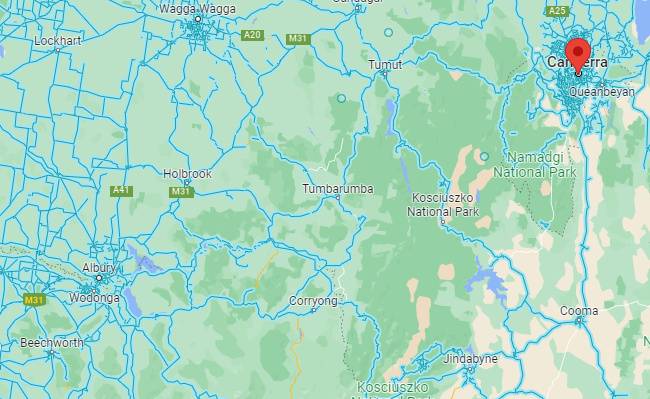

In [8]:
from IPython.display import Image
Image("/content/drive/MyDrive/Mineria de datos/Examen/índice.png")

### Comparando la temperatura mínima y máxima de Albury desde el año 2008 hasta el 2017

In [9]:
nombre = ['Albury2008','Albury2009', 'Albury2010', 'Albury2011', 'Albury2012', 'Albury2013', 'Albury2014', 'Albury2015', 'Albury2016', 'Albury2017']
anos = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

Albury = df[
    (df['Location'].str.contains('Albury') == True)
]
lineas = []
for i, j in zip(nombre, anos):
    temp = Albury[
        (Albury['Date'].str.contains(j) == True)
    ]
    lineas.append(temp)

Para comenzar filtraremos información del DataSet y solo dejaremos la información necesaria para encontrar los registros entre los años 2008 y 2017, dejando la ciudad de Albury, para simplificar todo y acotar algoritmos lo dejaremos declarado como una función parametrizada.

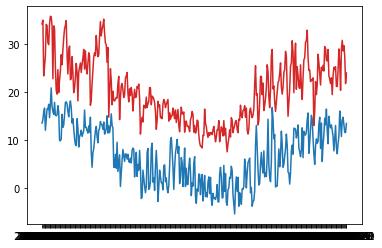

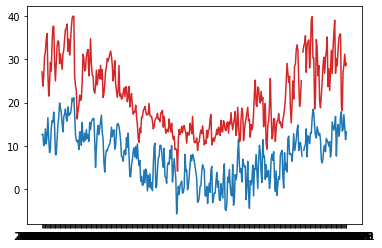

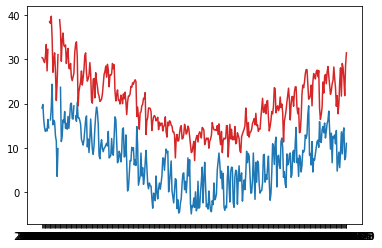

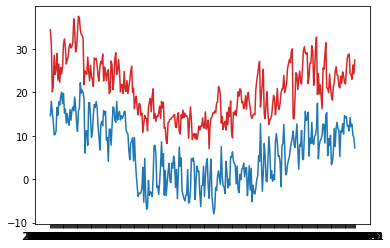

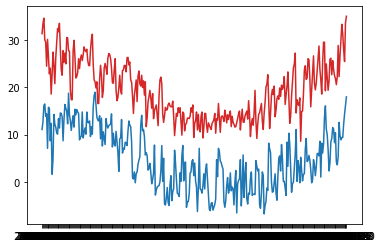

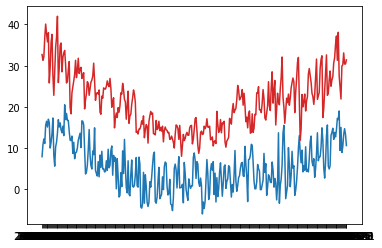

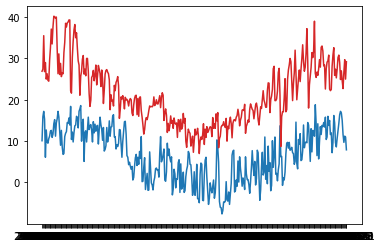

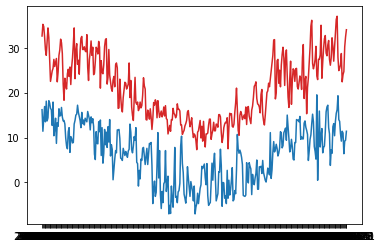

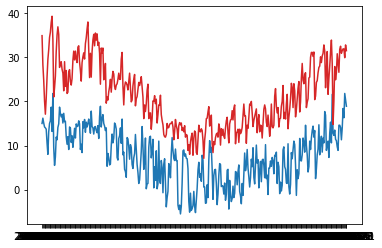

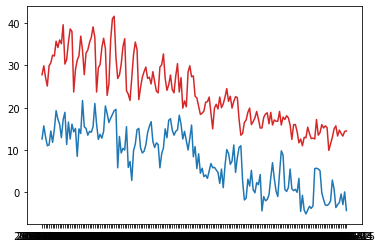

In [51]:
for i in lineas:
    fig, ax = plt.subplots()
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:red')
plt.show()

Obtuvimos el registro de las temperaturas máximas y mínimas de Albury desde el año 2008 hasta el 2017, cabe recalcar que justamente el primer y último año de registro tiene una cantidad menor de datos que las fechas dentro de ese rango.

### Comparando la temperatura mínima y máxima de Canberra desde el año 2008 hasta el 2017

In [11]:
nombre = ['Canberra2008','Canberra2009', 'Canberra2010', 'Canberra2011', 'Canberra2012', 'Canberra2013', 'Canberra2014', 'Canberra2015', 'Canberra2016', 'Canberra2017']
anos = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']

Canberra = df[
    (df['Location'].str.contains('Canberra') == True)
]
lineas = []
for i, j in zip(nombre, anos):
    temp = Canberra[
        (Canberra['Date'].str.contains(j) == True)
    ]
    lineas.append(temp)

De igual manera que el paso anterior filtraremos información del DataSet y solo dejaremos la información necesaria para encontrar los registros entre los años 2008 y 2017, dejando la ciudad de Canberra, para simplificar todo y acotar algoritmos lo dejaremos declarado como una función parametrizada.

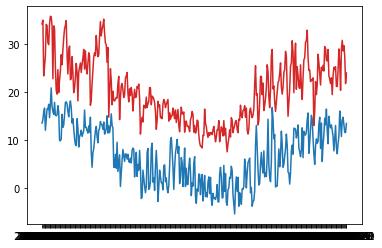

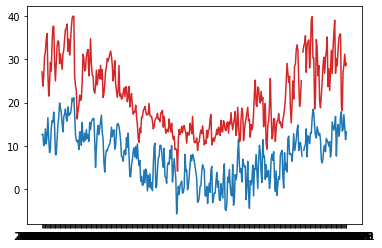

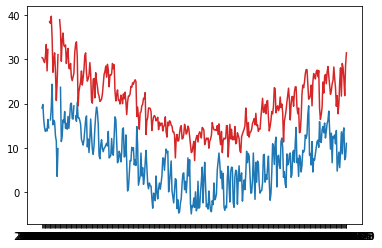

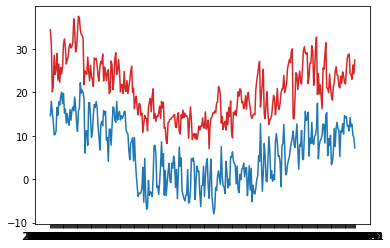

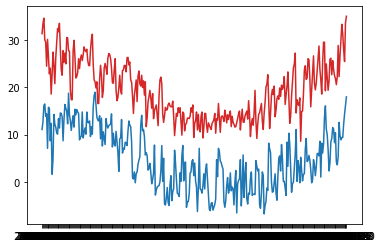

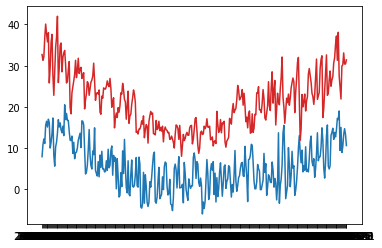

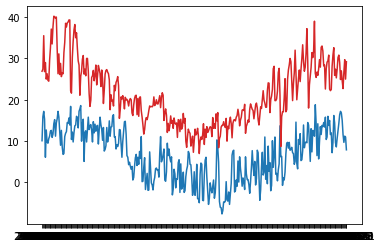

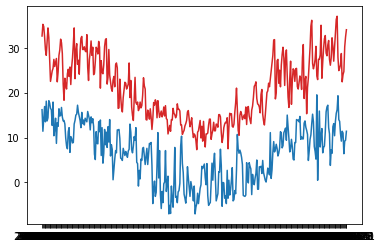

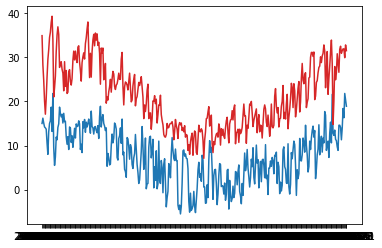

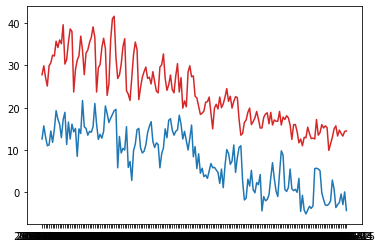

In [12]:
for i in lineas:
    fig, ax = plt.subplots()
    ax.plot(i['Date'], i['MinTemp'], color = 'tab:blue')
    ax.plot(i['Date'], i['MaxTemp'], color = 'tab:red')
plt.show()

Podemos observar que el clima en ambas ciudades es muy similar respecto a las fechas, incluyendo ciertas anomalías períodicas como la bajada de temperatura máxima en una determinada fecha. Por ende podemos decir que las condiciones climáticas no son un factor que sea determinante para entender porqué hay una diferencia de flora en ciudades que están relativamente cercas.

In [ ]:
nulosAlbury = Albury.isnull().sum()
totalNulos = Albury.isnull().sum().sum()
for i,j in zip(nulosAlbury, nombreCol):
    print(f'La columna {j} tiene un total de {i} datos nulos')
print(f'La ciudad de Albury posee un total de {totalNulos} datos nulos dentro del DataSet')

Calculamos el número de valores nulos por columna en la ciudad de Albury:
- La columna Date tiene un total de 0 datos nulos
- La columna Location tiene un total de 0 datos nulos
- La columna MinTemp tiene un total de 6 datos nulos
- La columna MaxTemp tiene un total de 1 datos nulos
- La columna Rainfall tiene un total de 20 datos nulos
- La columna Evaporation tiene un total de 3011 datos nulos
- La columna Sunshine tiene un total de 3011 datos nulos
- La columna WindGustDir tiene un total de 10 datos nulos
- La columna WindGustSpeed tiene un total de 10 datos nulos
- La columna WindDir9am tiene un total de 517 datos nulos
- La columna WindDir3pm tiene un total de 42 datos nulos
- La columna WindSpeed9am tiene un total de 4 datos nulos
- La columna WindSpeed3pm tiene un total de 7 datos nulos
- La columna Humidity9am tiene un total de 4 datos nulos
- La columna Humidity3pm tiene un total de 4 datos nulos
- La columna Pressure9am tiene un total de 0 datos nulos
- La columna Pressure3pm tiene un total de 4 datos nulos
- La columna Cloud9am tiene un total de 1729 datos nulos
- La columna Cloud3pm tiene un total de 1596 datos nulos
- La columna Temp9am tiene un total de 4 datos nulos
- La columna Temp3pm tiene un total de 4 datos nulos
- La columna RainToday tiene un total de 20 datos nulos
- La columna RISK_MM tiene un total de 0 datos nulos
- La columna RainTomorrow tiene un total de 0 datos nulos

La ciudad de Albury posee un total de 10004 datos nulos dentro del DataSet.

In [15]:
Albury2016 = Albury[Albury['Date'].str.contains('2016') == True]

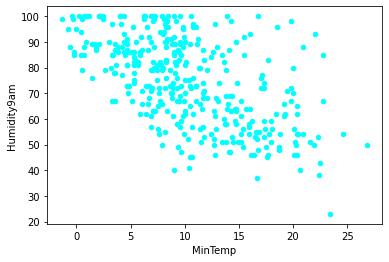

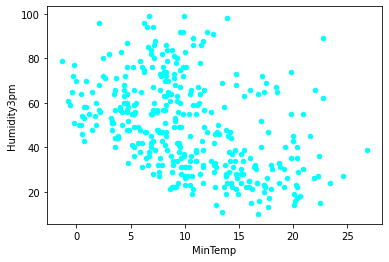

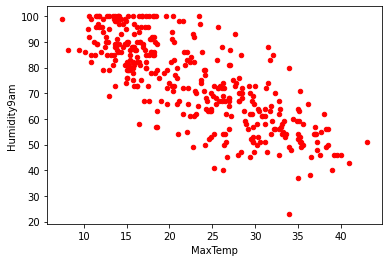

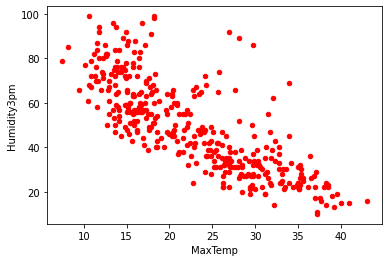

In [16]:
Albury2016.plot(kind = "scatter", x = "MinTemp", y = "Humidity9am", color = "cyan")

Albury2016.plot(kind = "scatter", x = "MinTemp", y = "Humidity3pm", color = "cyan")

Albury2016.plot(kind = "scatter", x = "MaxTemp", y = "Humidity9am", color = "red")

Albury2016.plot(kind = "scatter", x = "MaxTemp", y = "Humidity3pm", color = "red")

Acá podemos apreciar que no existe una relación concreta entre la temperatura mínima con la humedad, pero existe una relación inversamente proporcional entre la humedad y el calor máximo, lo que nos lleva a deducir que existe un clima relativamente seco en Albury.

Text(0, 0.5, 'Humedad')

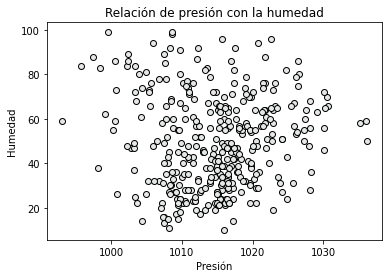

In [17]:
plt.scatter(x = Albury2016['Pressure3pm'], y = Albury2016['Humidity3pm'], edgecolors='black', color='#E5E8E8')
plt.title('Relación de presión con la humedad')
plt.xlabel('Presión')
plt.ylabel('Humedad')

Podemos ver que no existe un tipo de relación directa entre la presión registrada a las 3 pm con la húmedad, por ende establecer relaciones entre ambas no nos sirven para poder predecir alguna de las dos variables.

Text(0, 0.5, 'Temperatura mínima')

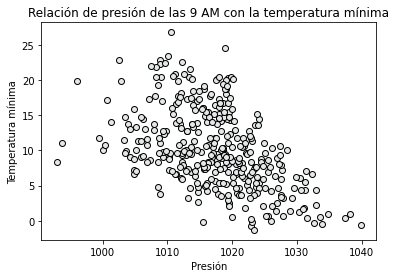

In [18]:
plt.scatter(x = Albury2016['Pressure9am'], y = Albury2016['MinTemp'], edgecolors='black', color='#E5E8E8')
plt.title('Relación de presión de las 9 AM con la temperatura mínima')
plt.xlabel('Presión')
plt.ylabel('Temperatura mínima')

Acá podemos ver que existe una relación proporcionalmente inversa entre la temperatura máxima y la presión, es decir, mientras mayor cantidad de temperatura la presión será menor, por su parte, mientras mayor cantidad de presión exista en el medio ambiente, la temperatura será menor. Por ende es una variable muy decisiva al momento de considerarla para llevar un modelo.

## Propuestas de limpieza
Luego de haber analizado el data set se establecen las siguientes propuestas de limpieza: 
- Dejar solo a albury dentro de la data final
- Eliminar los registros del año 2008 y 2017
- Eliminar columnas que no posean relación con la temperatura
- Imputar los datos nulos de las columnas que sean decisivas en relación a la temperatura
- Utilizar label encoder o one hot encoder según sea el caso

# 3.1 Pre-procesamiento de datos
En esta etapa de la metodología Crisp-DM nos enfocaremos principalmente en dejar los datos que nos sirven para llevar a cabo nuestro modelo de entrenamiento. Esto es debido a que posteriormente, cuando se llegue a una etapa de algoritmos predictivos todo responda de manera eficiente. Hagámonos una pregunta, si nuestro objetivo es predecir el clima de Albury ¿nos sirve tener en nuestro modelo, el clima o los valores de ciudades que sean ajenas de Albury?, la repuesta es no, y esto se explicará a continuación.

## 3.1.1 Filtro de años y  Albury
Para conseguir esto lo que haremos será dejar solamente a Albury entre los años 2009 y 2016 dentro de nuestro Dataframe, ya que nuestra meta final es predecir la temperatura mínima y máxima de Albury, tener más ciudades supondrían un mal funcionamiento de los algoritmos de predicción ya que estarían ensuciando la muestra de dispersión de datos de nuestra etiqueta.

In [19]:
Albury = Albury[Albury['Date'].str.contains('2008|2017') == False]
Albury

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
30,2009-01-01,Albury,11.3,26.5,0.0,NaN,NaN,WNW,56.0,W,...,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,0.0,No
31,2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,...,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,No,0.0,No
32,2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,...,22.0,1018.7,1014.8,NaN,NaN,17.1,26.5,No,0.0,No
33,2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,...,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,No,0.0,No
34,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,...,9.0,1012.6,1009.2,NaN,NaN,22.4,34.4,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,20.9,31.5,2.0,NaN,NaN,SE,37.0,SE,...,55.0,1012.6,1009.6,NaN,NaN,21.9,28.3,Yes,0.0,No
2836,2016-12-28,Albury,21.9,35.6,0.0,NaN,NaN,NW,50.0,NNE,...,26.0,1008.2,1004.9,NaN,NaN,28.1,34.4,No,3.8,Yes
2837,2016-12-29,Albury,22.0,27.7,3.8,NaN,NaN,E,28.0,SE,...,66.0,1007.4,1005.5,NaN,NaN,22.9,26.7,Yes,3.2,Yes
2838,2016-12-30,Albury,22.8,32.1,3.2,NaN,NaN,W,65.0,N,...,62.0,1002.5,999.2,NaN,NaN,24.3,30.6,Yes,4.4,Yes


## 3.1.2 Eliminando columnas que no utilizaremos
El propósito de llevar a cabo la eliminación de columnas, es verificar si hay datos que no serán relevantes en la elaboración de los algoritmos, estos datos suelen tener la columna completamente vacía o suele tener una cantidad muy baja de datos (en algunos casos ni siquiera cubre la mitad de datos que debería tener), por ende lo mejor en este caso sería optar a eliminarlos.

In [ ]:
columnas = Albury.columns
columnasBasura = []
for i in columnas:
    nulos = Albury[i].isnull().sum()
    if nulos == 2810:
        print(f'La columna {i} tiene todo vacío')
        columnasBasura.append(i) 
    elif nulos > 2810/2:
        print(f'La columna {i} tiene la mitad de los datos vacíos')
        columnasBasura.append(i)

- La columna Evaporation tiene todo vacío
- La columna Sunshine tiene todo vacío
- La columna Cloud9am tiene la mitad de los datos vacíos
- La columna Cloud3pm tiene la mitad de los datos vacíos

Comprobamos que las columnas que serán eliminadas están completamente o parcialmente vacías, para luego ser borradas.

In [ ]:
for i in columnasBasura:
    Albury.drop(i, 1, inplace=True)

In [22]:
Albury

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
30,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,31.0,46.0,26.0,1004.5,1003.2,19.7,25.7,No,0.0,No
31,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,11.0,44.0,22.0,1014.4,1013.1,14.9,22.1,No,0.0,No
32,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,7.0,43.0,22.0,1018.7,1014.8,17.1,26.5,No,0.0,No
33,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,17.0,41.0,12.0,1015.1,1010.3,20.7,33.9,No,0.0,No
34,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,26.0,41.0,9.0,1012.6,1009.2,22.4,34.4,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,20.9,31.5,2.0,SE,37.0,SE,SE,17.0,22.0,88.0,55.0,1012.6,1009.6,21.9,28.3,Yes,0.0,No
2836,2016-12-28,Albury,21.9,35.6,0.0,NW,50.0,NNE,NW,20.0,28.0,50.0,26.0,1008.2,1004.9,28.1,34.4,No,3.8,Yes
2837,2016-12-29,Albury,22.0,27.7,3.8,E,28.0,SE,E,6.0,15.0,93.0,66.0,1007.4,1005.5,22.9,26.7,Yes,3.2,Yes
2838,2016-12-30,Albury,22.8,32.1,3.2,W,65.0,N,NW,20.0,28.0,85.0,62.0,1002.5,999.2,24.3,30.6,Yes,4.4,Yes


Podemos observar que la cantidad de columnas se redujo a 20, por ende se limpió correctamente las columnas eliminadas.

### Analizando la proporcionalidad de nuestro Target
Esta etapa de visualización será fundamental para analizar las relaciones que existen entre las columnas que queremos predecir con las columnas numéricas.
Esto debido a que como la temperatura máxima y mínima son de tipo cuantitativas continuas, lo ideal sería establecer un algoritmo de regresión con sus respectivas métricas y analizar la correlación que existe.

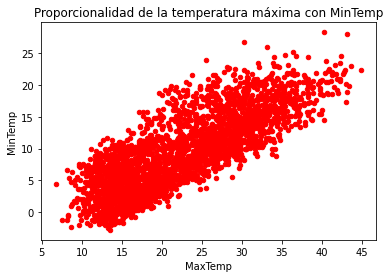

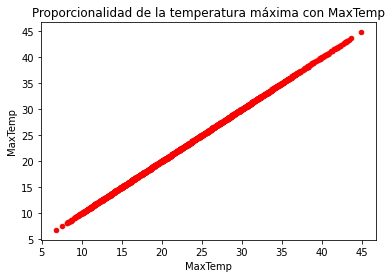

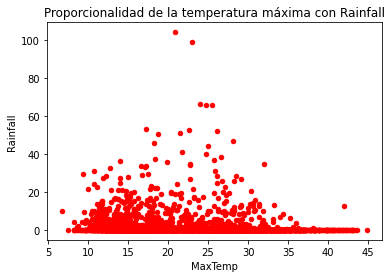

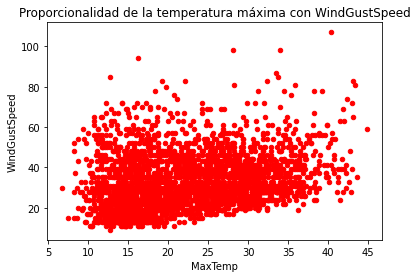

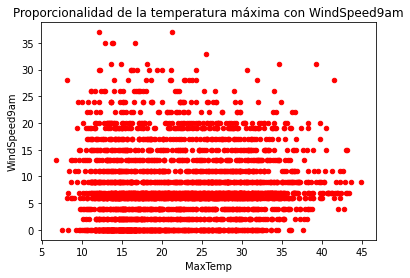

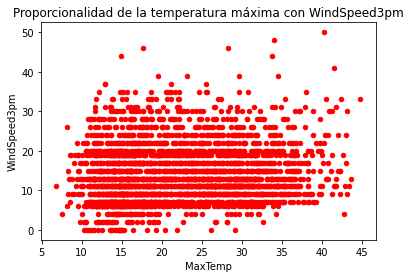

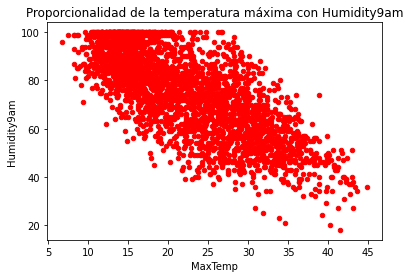

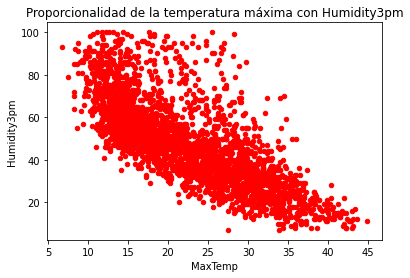

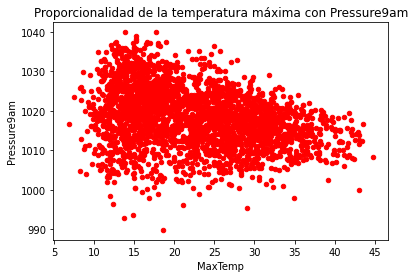

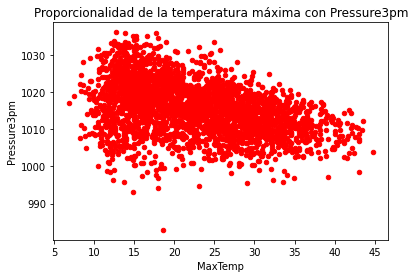

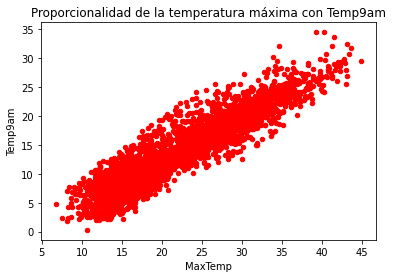

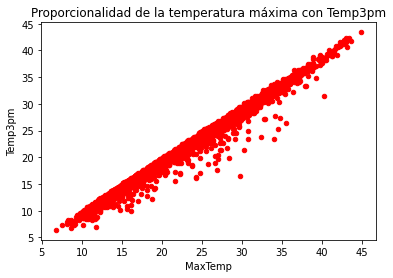

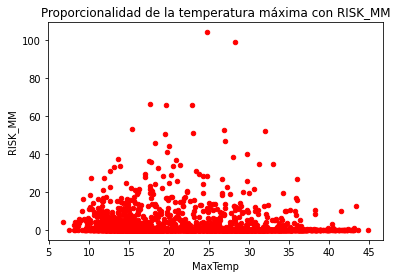

In [23]:
ColumnasNumericas = Albury._get_numeric_data().columns
for i in ColumnasNumericas:
    Albury.plot(kind = "scatter", x = "MaxTemp", y = i, color = "red")
    plt.title(f'Proporcionalidad de la temperatura máxima con {i}')

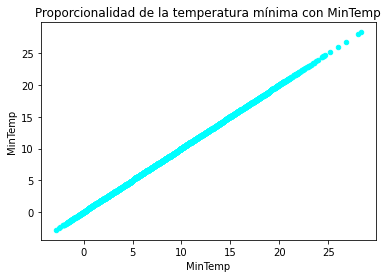

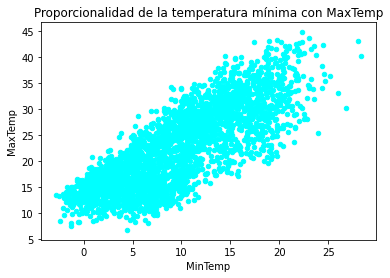

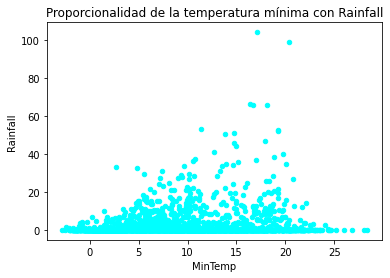

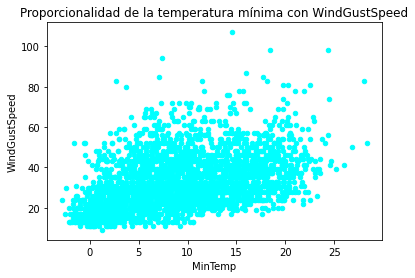

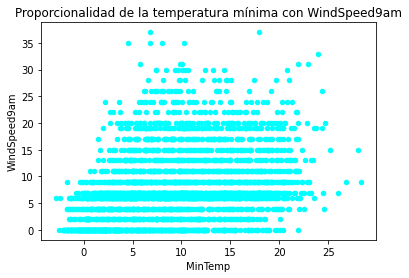

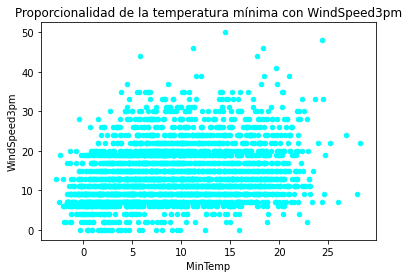

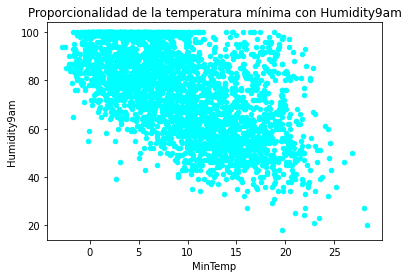

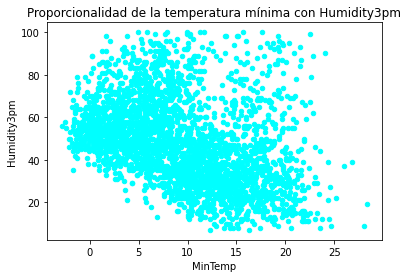

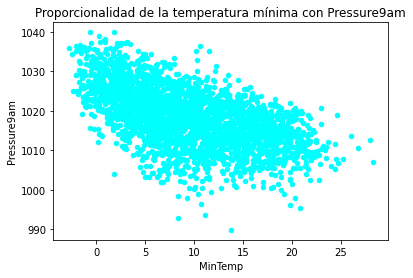

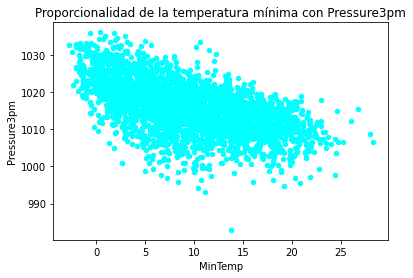

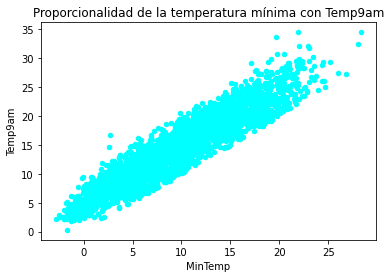

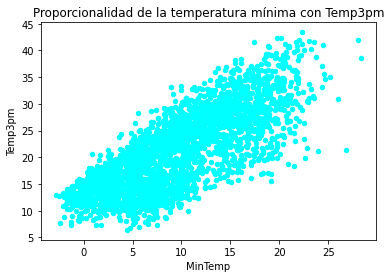

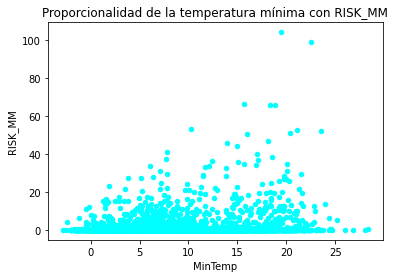

In [24]:
for i in ColumnasNumericas:
    Albury.plot(kind = "scatter", x = "MinTemp", y = i, color = "cyan")
    plt.title(f'Proporcionalidad de la temperatura mínima con {i}')

## 3.1.3 Procesando datos cualitativos a cuantitativos a través de One Hot Encoding
Existen dos formas de procesar datos que de forma primitiva son de tipo objeto en la data, la primera es Label Encoder y la segunda es One Hot Encoder,¿Porqué no usaremos Label Encoder?, ya que este tipo de transformación sirve para variables cualitativas ordinales, es decir, aquellos datos que están regidos por un orden estamental (por ejemplo: el nivel de educación) y en este dataframe los datos cualitativos se comportan de forma nominal, es decir, sin orden jerárquico.

In [ ]:
ColumnasObjeto = Albury.select_dtypes(include=['object']).columns
ColumnasObjeto

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [26]:
Albury[ColumnasObjeto]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
30,2009-01-01,Albury,WNW,W,WNW,No,No
31,2009-01-02,Albury,W,WSW,SSW,No,No
32,2009-01-03,Albury,SSE,SSE,E,No,No
33,2009-01-04,Albury,WNW,SSE,NW,No,No
34,2009-01-05,Albury,WNW,ENE,NW,No,No
...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,SE,SE,SE,Yes,No
2836,2016-12-28,Albury,NW,NNE,NW,No,Yes
2837,2016-12-29,Albury,E,SE,E,Yes,Yes
2838,2016-12-30,Albury,W,N,NW,Yes,Yes


In [27]:
RainTomorrow_dummy = pd.get_dummies(Albury['RainTomorrow'], prefix='RainTomorrow')
AlburyOHE = pd.concat([Albury, RainTomorrow_dummy], axis = 1)
AlburyOHE = AlburyOHE.drop(['RainTomorrow'], axis=1)
AlburyOHE

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow_No,RainTomorrow_Yes
30,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,...,46.0,26.0,1004.5,1003.2,19.7,25.7,No,0.0,1,0
31,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,...,44.0,22.0,1014.4,1013.1,14.9,22.1,No,0.0,1,0
32,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,...,43.0,22.0,1018.7,1014.8,17.1,26.5,No,0.0,1,0
33,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,...,41.0,12.0,1015.1,1010.3,20.7,33.9,No,0.0,1,0
34,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,...,41.0,9.0,1012.6,1009.2,22.4,34.4,No,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,20.9,31.5,2.0,SE,37.0,SE,SE,17.0,...,88.0,55.0,1012.6,1009.6,21.9,28.3,Yes,0.0,1,0
2836,2016-12-28,Albury,21.9,35.6,0.0,NW,50.0,NNE,NW,20.0,...,50.0,26.0,1008.2,1004.9,28.1,34.4,No,3.8,0,1
2837,2016-12-29,Albury,22.0,27.7,3.8,E,28.0,SE,E,6.0,...,93.0,66.0,1007.4,1005.5,22.9,26.7,Yes,3.2,0,1
2838,2016-12-30,Albury,22.8,32.1,3.2,W,65.0,N,NW,20.0,...,85.0,62.0,1002.5,999.2,24.3,30.6,Yes,4.4,0,1


In [28]:
RainToday_dummy = pd.get_dummies(Albury['RainToday'], prefix='RainToday')
AlburyOHE = pd.concat([AlburyOHE, RainToday_dummy], axis = 1)
AlburyOHE = AlburyOHE.drop(['RainToday'], axis=1)
AlburyOHE

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_No,RainTomorrow_Yes,RainToday_No,RainToday_Yes
30,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,...,26.0,1004.5,1003.2,19.7,25.7,0.0,1,0,1,0
31,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,...,22.0,1014.4,1013.1,14.9,22.1,0.0,1,0,1,0
32,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,...,22.0,1018.7,1014.8,17.1,26.5,0.0,1,0,1,0
33,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,...,12.0,1015.1,1010.3,20.7,33.9,0.0,1,0,1,0
34,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,...,9.0,1012.6,1009.2,22.4,34.4,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,20.9,31.5,2.0,SE,37.0,SE,SE,17.0,...,55.0,1012.6,1009.6,21.9,28.3,0.0,1,0,0,1
2836,2016-12-28,Albury,21.9,35.6,0.0,NW,50.0,NNE,NW,20.0,...,26.0,1008.2,1004.9,28.1,34.4,3.8,0,1,1,0
2837,2016-12-29,Albury,22.0,27.7,3.8,E,28.0,SE,E,6.0,...,66.0,1007.4,1005.5,22.9,26.7,3.2,0,1,0,1
2838,2016-12-30,Albury,22.8,32.1,3.2,W,65.0,N,NW,20.0,...,62.0,1002.5,999.2,24.3,30.6,4.4,0,1,0,1


Se ha aplicado correctamente One Hot Encoding a las columnas RainTomorrow y RainToday.

### Determinando las relaciones cuantitativas
Como ya ambas variables relacionadas con la lluvia representan un dato numérico será comprensible evaluarlos dentro de un gráfico de dispersión para ver la relación que poseen, como son variables que en su comportamiento son de tipo categóricas, lo que se espera para ver si tienen alguna relación proporcional ya sea directa o inversa (con la temperatura máxima y mínima), es que el gráfico de dispersión muestre un esquema donde existan datos acoplados en dirección contraria a los dos valores existentes (0 y 1). Pero antes analizaremos la cantidad de datos que existen y que apuntan a la proporción de días que llovió y días que no llovió.

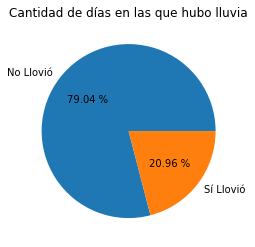

In [29]:
RainToday_Yes = AlburyOHE['RainToday_Yes'].value_counts()
nombres = ['No Llovió','Sí Llovió']
plt.title("Cantidad de días en las que hubo lluvia")
plt.pie(RainToday_Yes, labels = nombres ,autopct="%0.2f %%")
plt.show()

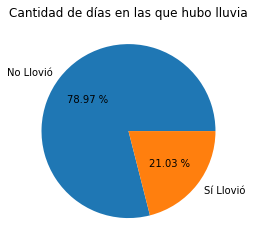

In [30]:
RainTomorrow_Yes = AlburyOHE['RainTomorrow_Yes'].value_counts()
nombres = ['No Llovió','Sí Llovió']
plt.title("Cantidad de días en las que hubo lluvia")
plt.pie(RainTomorrow_Yes, labels = nombres ,autopct="%0.2f %%")
plt.show()

Text(0.5, 1.0, 'Proporcionalidad de la temperatura minima con días de lluvia')

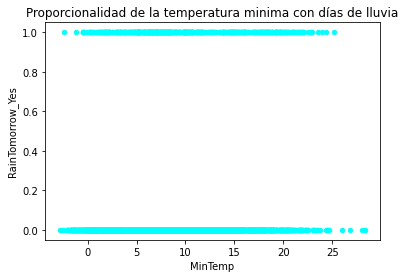

In [31]:
AlburyOHE.plot(kind = "scatter", x = "MinTemp", y = "RainTomorrow_Yes", color = "cyan")
plt.title(f'Proporcionalidad de la temperatura minima con días de lluvia')

Text(0.5, 1.0, 'Proporcionalidad de la temperatura máxima con días de lluvia')

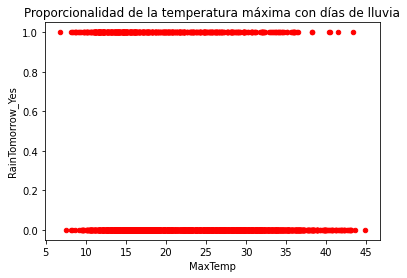

In [32]:
AlburyOHE.plot(kind = "scatter", x = "MaxTemp", y = "RainTomorrow_Yes", color = "red")
plt.title(f'Proporcionalidad de la temperatura máxima con días de lluvia')

Podemos ver claramente que los datos no tienen una relación tanto la temperatura mínima/máxima con los días de lluvia, ya que no se acoplan como se esperaba para establecer relaciones proporcionales dentro de los dos posibles valores, por ende se optará por eliminarlos del dataset, pero guardandolo en otra variable, para dejar respaldada esta información, también se borrarán las otras columnas de tipo objeto porque realmente no posee ninguna relación respecto los niveles temperamentales de la ciudad.

In [33]:
AlburyLimpio = AlburyOHE.drop(columns=['RainTomorrow_Yes', 'RainTomorrow_No', 'RainToday_Yes', 'RainToday_No', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
AlburyLimpio

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
30,2009-01-01,Albury,11.3,26.5,0.0,56.0,19.0,31.0,46.0,26.0,1004.5,1003.2,19.7,25.7,0.0
31,2009-01-02,Albury,9.6,23.9,0.0,41.0,19.0,11.0,44.0,22.0,1014.4,1013.1,14.9,22.1,0.0
32,2009-01-03,Albury,10.5,28.8,0.0,26.0,11.0,7.0,43.0,22.0,1018.7,1014.8,17.1,26.5,0.0
33,2009-01-04,Albury,12.3,34.6,0.0,37.0,6.0,17.0,41.0,12.0,1015.1,1010.3,20.7,33.9,0.0
34,2009-01-05,Albury,12.9,35.8,0.0,41.0,6.0,26.0,41.0,9.0,1012.6,1009.2,22.4,34.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,20.9,31.5,2.0,37.0,17.0,22.0,88.0,55.0,1012.6,1009.6,21.9,28.3,0.0
2836,2016-12-28,Albury,21.9,35.6,0.0,50.0,20.0,28.0,50.0,26.0,1008.2,1004.9,28.1,34.4,3.8
2837,2016-12-29,Albury,22.0,27.7,3.8,28.0,6.0,15.0,93.0,66.0,1007.4,1005.5,22.9,26.7,3.2
2838,2016-12-30,Albury,22.8,32.1,3.2,65.0,20.0,28.0,85.0,62.0,1002.5,999.2,24.3,30.6,4.4


## 3.1.4 Inputación de valores nulos
En esta etapa nos dedicaremos fundamentalmente a cambiar el valor de los datos nulos, antes que nada, hagamonos una pregunta... ¿Porqué les reemplazaremos el valor y simplemente no los borramos?, resulta que la cantidad de información de la data es demasiado valiosa, en caso de eliminarse, esta última podría tener comportamientos de un sesgo en el modelo final o simplemente recurrir al overfiting o underfiting con una cantidad baja de datos, por ende lo mejor es optar simplemente por la inputación.
Con esta premisa, hay que destacar que existen muchísimos métodos para inputar datos, tales como dejarlos en 0, cambiarlos por la moda, la mediana o la media aritmética, como acá estamos trabajando con registros temperamentales lo ideal sería aplicar un algoritmo de inputación de KNN. ¿Qué significa esto?, básicamente agruparán los datos (en este caso se formarán 10 grupos) y de acuerdo a la agrupación que llevan a cabo se le asigna un valor.

In [34]:
from sklearn.impute import KNNImputer
alburyKNN = AlburyLimpio.copy()
alburyKNN = pd.DataFrame(alburyKNN)
alburyKNN
knn = KNNImputer(n_neighbors=10, weights="uniform")
alburyKNN[
    [
        "MinTemp",
        "MaxTemp",
        "Rainfall",
        "WindGustSpeed",
        "WindSpeed9am",
        "WindSpeed3pm",
        "Humidity9am",
        "Humidity3pm",
        "Pressure3pm",
        "Temp9am",
        "Temp3pm",
    ]
] = knn.fit_transform(
    alburyKNN[
        [
            "MinTemp",
            "MaxTemp",
            "Rainfall",
            "WindGustSpeed",
            "WindSpeed9am",
            "WindSpeed3pm",
            "Humidity9am",
            "Humidity3pm",
            "Pressure3pm",
            "Temp9am",
            "Temp3pm",
        ]
    ]
)
alburyKNN

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
30,2009-01-01,Albury,11.3,26.5,0.0,56.0,19.0,31.0,46.0,26.0,1004.5,1003.2,19.7,25.7,0.0
31,2009-01-02,Albury,9.6,23.9,0.0,41.0,19.0,11.0,44.0,22.0,1014.4,1013.1,14.9,22.1,0.0
32,2009-01-03,Albury,10.5,28.8,0.0,26.0,11.0,7.0,43.0,22.0,1018.7,1014.8,17.1,26.5,0.0
33,2009-01-04,Albury,12.3,34.6,0.0,37.0,6.0,17.0,41.0,12.0,1015.1,1010.3,20.7,33.9,0.0
34,2009-01-05,Albury,12.9,35.8,0.0,41.0,6.0,26.0,41.0,9.0,1012.6,1009.2,22.4,34.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2016-12-27,Albury,20.9,31.5,2.0,37.0,17.0,22.0,88.0,55.0,1012.6,1009.6,21.9,28.3,0.0
2836,2016-12-28,Albury,21.9,35.6,0.0,50.0,20.0,28.0,50.0,26.0,1008.2,1004.9,28.1,34.4,3.8
2837,2016-12-29,Albury,22.0,27.7,3.8,28.0,6.0,15.0,93.0,66.0,1007.4,1005.5,22.9,26.7,3.2
2838,2016-12-30,Albury,22.8,32.1,3.2,65.0,20.0,28.0,85.0,62.0,1002.5,999.2,24.3,30.6,4.4


In [35]:
alburyKNN.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

Acá podemos notar que actualmente todas las columnas quedaron con datos y ya no existe información vacía dentro de nuestro dataframe

## 3.1.5 Limpieza de valores atípicos
En esta sección de la limpieza nos encargaremos antes de nada de obtener las columnas que representaban una relación ya sea proporcionalmente directa o proporcionalmente directa (del punto 3.1.2) y estas mismas eliminarles aquellas filas que contienen datos atípicos y que ensuciarían las métricas de rendimiento dentro de un algoritmo de predicción.

In [36]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[  (df[ft] < lower_bound) | (df[ft] > upper_bound )]
  return ls

Acá utilizaremos la técnica de los rangos intercuartiles, esta técnica trata sobre determinar un valor dentro rango numérico que se divide en 4 (es decir el 25% del total de la muestra) y analiza la comparación de los valores dentro de esos pequeños rangos. Si el algoritmo establece que los últimos rangos son extremadamente atípicos los elimina. Entonces, a través del cálculo del IQR que en este caso está dado por la resta del tercer cuartil con el primer cuartil determinará un rango numérico en las cuales agrupa correctamente toda la muestra.

In [37]:
index_list = []
for i in ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RISK_MM']:
    index_list.extend(outliers(alburyKNN,i))

In [38]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [39]:
AlburyLimpiox2 = remove(alburyKNN, index_list)
AlburyLimpiox2.shape

(1807, 15)

Finalmente dejamos en una variable nueva el resultado de nuestro dataframe final respaldando los datos del dataframe que se acabó de limpiar con su respectiva variable.
Pasemos a graficas a través de un diagrama de dispersión como quedaron los datos con la respectiva limpieza.

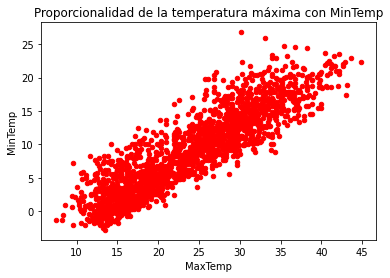

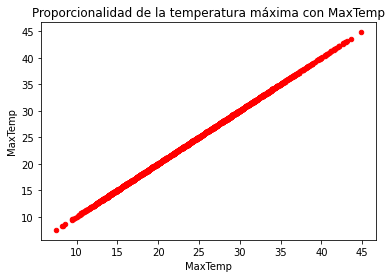

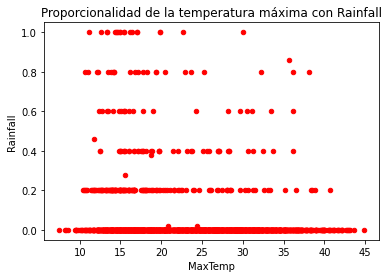

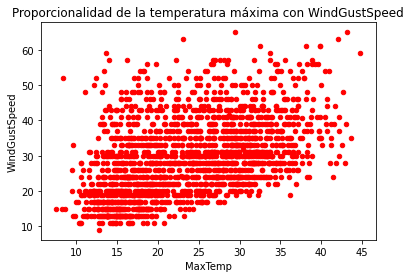

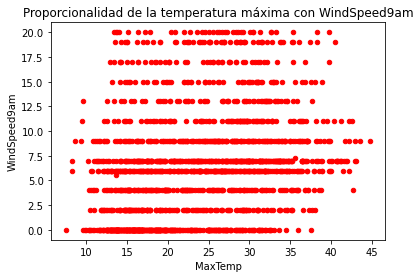

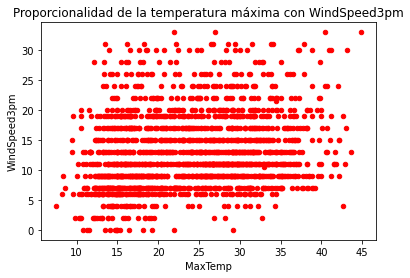

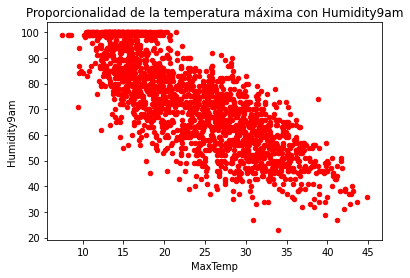

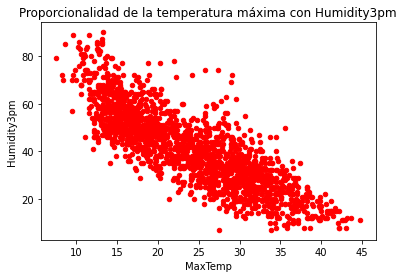

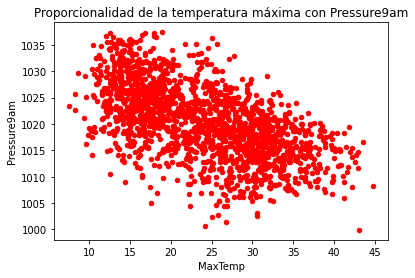

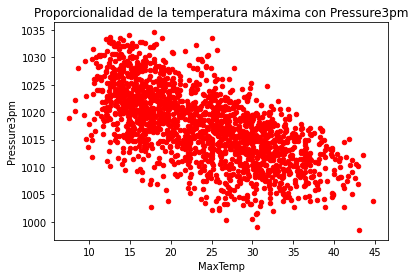

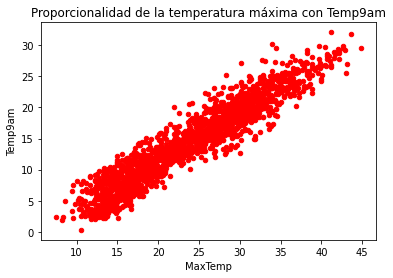

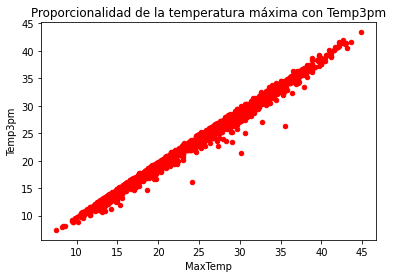

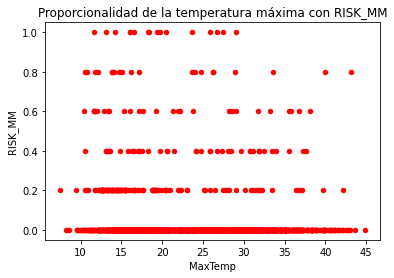

In [40]:
ColumnasNumericasx2 = AlburyLimpiox2._get_numeric_data().columns
for i in ColumnasNumericas:
    AlburyLimpiox2.plot(kind = "scatter", x = "MaxTemp", y = i, color = "red")
    plt.title(f'Proporcionalidad de la temperatura máxima con {i}')

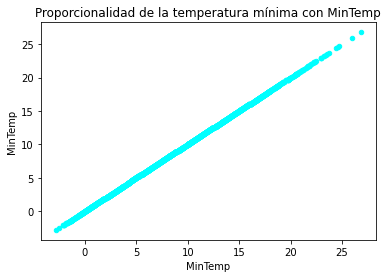

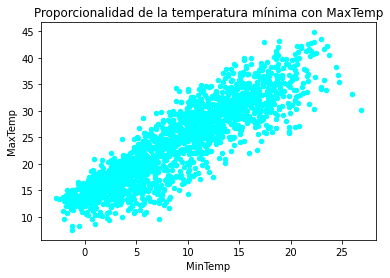

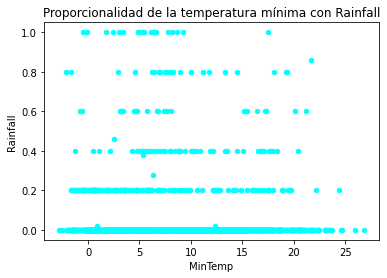

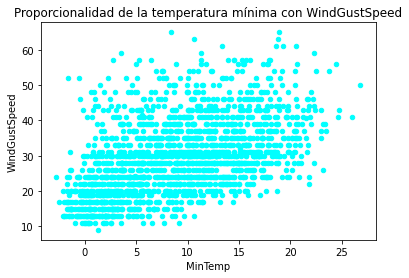

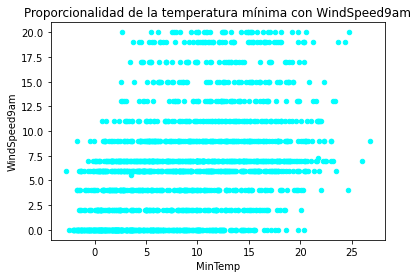

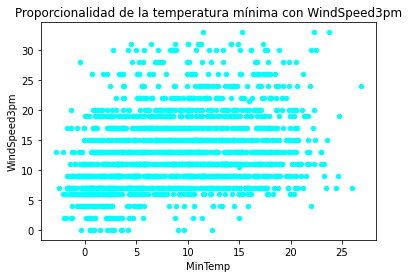

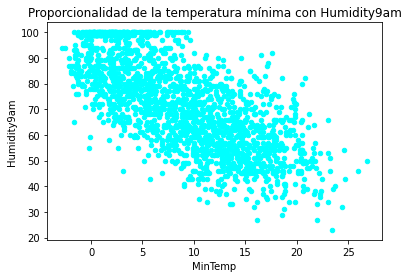

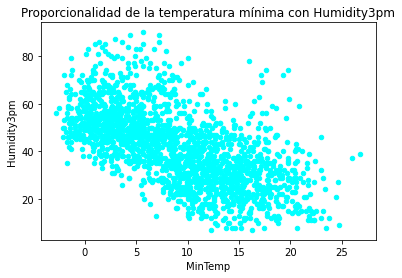

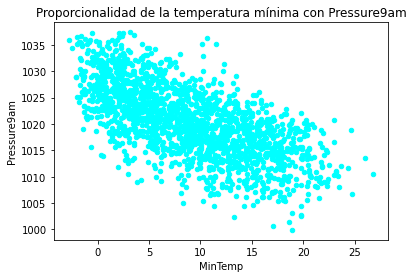

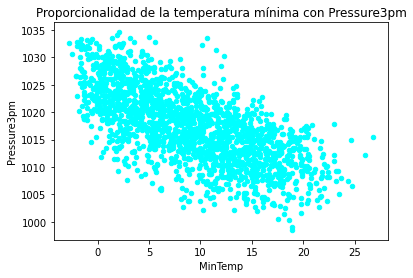

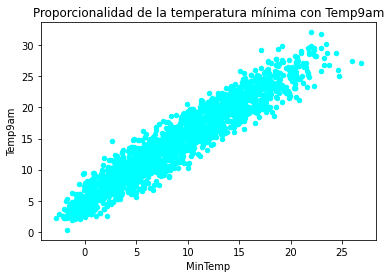

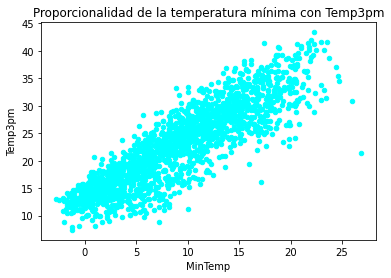

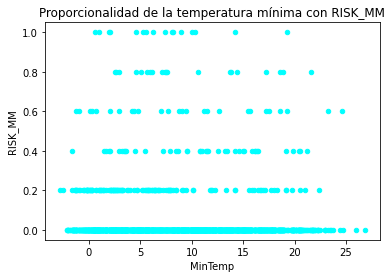

In [41]:
for i in ColumnasNumericasx2:
    AlburyLimpiox2.plot(kind = "scatter", x = "MinTemp", y = i, color = "cyan")
    plt.title(f'Proporcionalidad de la temperatura mínima con {i}')

Podemos observar que cambió ligeramente, ya que de por sí este dataframe no representaba mayores inconvenientes con datos de índole atípico, aún así se puede apreciar que el dataframe se comportará de mejor manera cuando se apliquen los modelos de regresión.
Ya realizado el pre-procesamiento, buscaremos un modelo de datos entendible para aplicarlos a los diversos modelos de algoritmos de machine learning. Obviamente como nuestros target son de tipo cuantitativo continuo en teoría el mejor modelo que podríamos llevar a cabo es el de regresión.

# 4.1 Modelos y evaluación
En esta sección del proyecto nos dedicaremos a implementar diferentes algoritmos de aprendizaje para evaluar nuestra columna objetivo buscando el mejor modelo de predicción que se ajuste a nuestro dataset, nos fijaremos en las diversas métricas que estos nos ofrece y separaremos esta sección con los modelos supervisados de regresión y clasificación con los modelos no supervisados de clustering y estimación de covarianza.

In [42]:
from sklearn import linear_model, ensemble, tree, naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


Acá enlistaremos una serie de algoritmos de predicción para llevar a cabo un modelo a "fuerza bruta", es decir, aplicando una serie de modelos de regresión para analizar su porcentaje de acierto y dependiendo de dicho porcentaje, se llevarán a cabo diversas métricas de rendimiento de acuerdo al tipo de algoritmo.

In [43]:
algoritmosMax = ['Bayesian Ridge', 'Lineal Regression', 'Lasso', 'Random Forest Regressor', 'Tweedie Regressor', 'Extra Tree Regressor', 
              'Decision Tree Regressor', 'Ada Boost Regressor', 'Bagging Regressor', 'Gradient Boosting Regressor',
             'Hist Gradient Boosting Regressor', 'ARDRegression', 'Gamma Regressor', 'Huber Regressor', 'Passive Aggressive Regressor',
             'Poisson Regressor']
reg = linear_model
en = ensemble
tr = tree
nb = naive_bayes
metodosMax = [reg.BayesianRidge(), reg.LinearRegression(), reg.Lasso(), en.RandomForestRegressor(), reg.TweedieRegressor(), 
           tr.ExtraTreeRegressor(), tr.DecisionTreeRegressor(), en.AdaBoostRegressor(), en.BaggingRegressor(),
           en.GradientBoostingRegressor(), en.HistGradientBoostingRegressor(), reg.ARDRegression(), reg.GammaRegressor(),
          reg.HuberRegressor(), reg.PassiveAggressiveRegressor(), reg.PoissonRegressor()]

algoritmosMin = ['Bayesian Ridge', 'Lineal Regression', 'Lasso', 'Random Forest Regressor', 'Tweedie Regressor', 'Extra Tree Regressor', 
              'Decision Tree Regressor', 'Ada Boost Regressor', 'Bagging Regressor', 'Gradient Boosting Regressor',
             'Hist Gradient Boosting Regressor', 'ARDRegression',  'Huber Regressor', 'Passive Aggressive Regressor']
metodosMin = [reg.BayesianRidge(), reg.LinearRegression(), reg.Lasso(), en.RandomForestRegressor(), reg.TweedieRegressor(), 
           tr.ExtraTreeRegressor(), tr.DecisionTreeRegressor(), en.AdaBoostRegressor(), en.BaggingRegressor(),
           en.GradientBoostingRegressor(), en.HistGradientBoostingRegressor(), reg.ARDRegression(),
          reg.HuberRegressor(), reg.PassiveAggressiveRegressor()]


Finalmente parametrizamos la etiqueta para que el usuario decida lo que quiera predecir, ejecutando de forma única la opción elegida.

In [ ]:
import joblib
etiquetaMax = AlburyLimpiox2['MaxTemp']
etiquetaMin = AlburyLimpiox2['MinTemp']
columnasProporcionales = AlburyLimpiox2[['Temp9am','Pressure3pm', 'Humidity3pm', 'Pressure9am']]
print('Presione 1 para predecir la temperatura máxima')
print('Presione 2 para predecir la temperatura mínima')
opcion = int(input())
if opcion == 1:
    X_train, X_test, y_train, y_test = train_test_split(columnasProporcionales, etiquetaMax, test_size = 0.30, random_state = 200)   
    for i, j in zip(algoritmosMax, metodosMax):
        j.fit(X_train, y_train)
        temp_y_pred = j.predict(X_test)
        resultado = j.score(X_test, y_test)
        mse = mean_squared_error(y_test, temp_y_pred)
        r2 = r2_score(y_test, temp_y_pred)
        print(f'El algoritmo {i} tiene un score de {resultado*100}')
        print(f'El algoritmo {i} tiene un error cuadrado medio (MSE) de {mse}')
        print(f'El algoritmo {i} tiene un coeficiente de determinación (r2) de {r2}')
        print(f'------------------------------------------------------------------------------------------')
elif opcion == 2:
    X_train, X_test, y_train, y_test = train_test_split(columnasProporcionales, etiquetaMin, test_size = 0.30, random_state = 200)
    for i, j in zip(algoritmosMin, metodosMin):
        j.fit(X_train, y_train)
        temp_y_pred = j.predict(X_test)
        resultado = j.score(X_test, y_test)
        mse = mean_squared_error(y_test, temp_y_pred)
        r2 = r2_score(y_test, temp_y_pred)
        print(f'El algoritmo {i} tiene un score de {resultado*100}')
        print(f'El algoritmo {i} tiene un error cuadrado medio (MSE) de {mse}')
        print(f'El algoritmo {i} tiene un coeficiente de determinación (r2) de {r2}')
        print(f'------------------------------------------------------------------------------------------')
else:
    print('Opción inválida')

Para este caso utilizaremos la opción de predecir la temperatura máxima:

- El algoritmo Bayesian Ridge tiene un score de 94.8561104502267
- El algoritmo Bayesian Ridge tiene un error cuadrado medio (MSE) de 3.076055643675158
- El algoritmo Bayesian Ridge tiene un coeficiente de determinación (r2) de 0.9485611045022669
---
- El algoritmo Lineal Regression tiene un score de 94.85659098684532
- El algoritmo Lineal Regression tiene un error cuadrado medio (MSE) de 3.075768281871719
- El algoritmo Lineal Regression tiene un coeficiente de determinación (r2) de 0.9485659098684532
---
- El algoritmo Lasso tiene un score de 93.87016641541965
- El algoritmo Lasso tiene un error cuadrado medio (MSE) de 3.6656520343577226
- El algoritmo Lasso tiene un coeficiente de determinación (r2) de 0.9387016641541964
---
- El algoritmo Random Forest Regressor tiene un score de 94.3943458481313
- El algoritmo Random Forest Regressor tiene un error cuadrado medio (MSE) de 3.352191745856353
- El algoritmo Random Forest Regressor tiene un coeficiente de determinación (r2) de 0.9439434584813129
---
- El algoritmo Tweedie Regressor tiene un score de 94.53756512323407
- El algoritmo Tweedie Regressor tiene un error cuadrado medio (MSE) de 3.266546349469022
- El algoritmo Tweedie Regressor tiene un coeficiente de determinación (r2) de 0.9453756512323408
---
- El algoritmo Extra Tree Regressor tiene un score de 87.62105319201848
- El algoritmo Extra Tree Regressor tiene un error cuadrado medio (MSE) de 7.402633517495396
- El algoritmo Extra Tree Regressor tiene un coeficiente de determinación (r2) de 0.8762105319201847
---
- El algoritmo Decision Tree Regressor tiene un score de 88.62159205466133
- El algoritmo Decision Tree Regressor tiene un error cuadrado medio (MSE) de 6.804309392265194
- El algoritmo Decision Tree Regressor tiene un coeficiente de determinación (r2) de 0.8862159205466134
---
- El algoritmo Ada Boost Regressor tiene un score de 93.59908238126661
- El algoritmo Ada Boost Regressor tiene un error cuadrado medio (MSE) de 3.8277607975996175
- El algoritmo Ada Boost Regressor tiene un coeficiente de determinación (r2) de 0.9359908238126661
---
- El algoritmo Bagging Regressor tiene un score de 93.97191364697734
- El algoritmo Bagging Regressor tiene un error cuadrado medio (MSE) de 3.6048069981583795
- El algoritmo Bagging Regressor tiene un coeficiente de determinación (r2) de 0.9397191364697735
---
- El algoritmo Gradient Boosting Regressor tiene un score de 94.85686961070193
- El algoritmo Gradient Boosting Regressor tiene un error cuadrado medio (MSE) de 3.0756016642804385
- El algoritmo Gradient Boosting Regressor tiene un coeficiente de determinación (r2) de 0.9485686961070193
---
- El algoritmo Hist Gradient Boosting Regressor tiene un score de 94.63861560521131
- El algoritmo Hist Gradient Boosting Regressor tiene un error cuadrado medio (MSE) de 3.206117970831724
- El algoritmo Hist Gradient Boosting Regressor tiene un coeficiente de determinación (r2) de 0.9463861560521131
---
- El algoritmo ARDRegression tiene un score de 94.85655107650545
- El algoritmo ARDRegression tiene un error cuadrado medio (MSE) de 3.075792148330161
- El algoritmo ARDRegression tiene un coeficiente de determinación (r2) de 0.9485655107650546
---
- El algoritmo Gamma Regressor tiene un score de -0.06053528373688444
- El algoritmo Gamma Regressor tiene un error cuadrado medio (MSE) de 59.83850963295756
- El algoritmo Gamma Regressor tiene un coeficiente de determinación (r2) de -0.0006408206817356543
---
- El algoritmo Huber Regressor tiene un score de 94.84154520714017
- El algoritmo Huber Regressor tiene un error cuadrado medio (MSE) de 3.0847656864869797
- El algoritmo Huber Regressor tiene un coeficiente de determinación (r2) de 0.9484154520714018
---
- El algoritmo Passive Aggressive Regressor tiene un score de 87.58699351888558
- El algoritmo Passive Aggressive Regressor tiene un error cuadrado medio (MSE) de 7.423001266209361
- El algoritmo Passive Aggressive Regressor tiene un coeficiente de determinación (r2) de 0.8758699351888558
---
- El algoritmo Poisson Regressor tiene un score de 93.51547429462343
- El algoritmo Poisson Regressor tiene un error cuadrado medio (MSE) de 3.8271374163279006
- El algoritmo Poisson Regressor tiene un coeficiente de determinación (r2) de 0.9360012482157998

## Mejor modelo
Elegimos el modelo Gradient Boosting Regressor debido a que está en un punto intermedio, al no estar tan alto en porcentaje para evitar un bloqueo de aprendizaje autónomo
y tampoco tan bajo para tener un grado muy alto de predicción.

MSE: 3.07


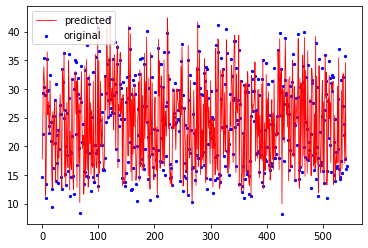

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3.1254

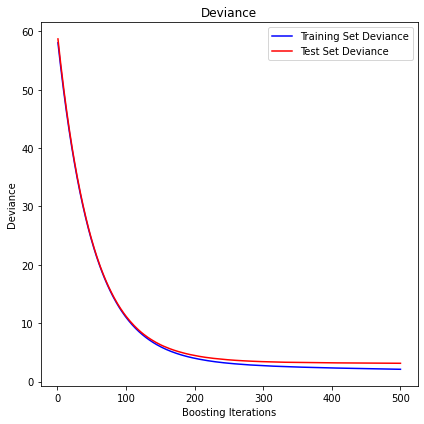

In [47]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

# Conclusión